## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## General Settings

In [3]:
# Ensure pandas shows all columns in dataframe
pd.set_option('display.max_columns', None)
#Set default decimal point to not be scientific notation
pd.set_option('display.float_format', lambda x: '%.0f' % x)

## Import Datasets

In [4]:
# Define the path
path = r'/Users/quincy/Documents/CF_Da/6/Airbnb Berlin/02 Data/Cleaned Data/'
# Join the path and filename
file_path0 = os.path.join(path, 'listing_cleaned2.csv')
df_listing = pd.read_csv(file_path0)

## Linear Regression Analysis: Assess relationship between price and review score rating

Here my hypothesis is that more expensive properties are more likely to get a positive review (high score) than cheaper properties. Let's see!

In [26]:
#I know that I already cleaned the dataset for no NaN in price, but I need to do the same for reviews. 

In [25]:
df_listing['review_scores_rating'].value_counts(dropna=False)

review_scores_rating
NaN    1999
5      1500
5       166
4       154
5       153
       ... 
0         1
4         1
4         1
4         1
3         1
Name: count, Length: 135, dtype: int64

In [27]:
df_listing.shape

(8400, 28)

In [28]:
# Create a new DataFrame without missing values in 'review_scores_rating'
df_listings_No_Missing_Rating = df_listing.dropna(subset=['review_scores_rating']).copy()

# Verify the shape of the new DataFrame
print("Shape of df_listings_No_Missing_Rating:", df_listings_No_Missing_Rating.shape)


Shape of df_listings_No_Missing_Rating: (6401, 28)


Perfect, it looks like we dropped exactly 1999 rows, which is how many were NaN in review scores.

Now onto the regression

In [30]:
# Prepare the data
X = df_listings_No_Missing_Rating[['price']]
y = df_listings_No_Missing_Rating['review_scores_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Print the coefficients
print(f"Coefficients: {reg.coef_}")

Mean Squared Error: 0.14558761554027738
R^2 Score: 0.001038325842140586
Coefficients: [0.00017696]


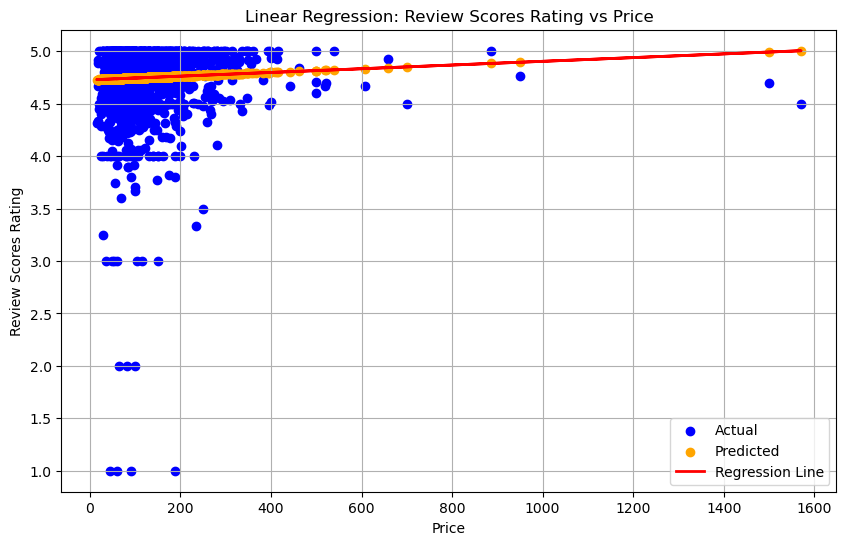

In [33]:
# Plot the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='orange', label='Predicted')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Price')
plt.ylabel('Review Scores Rating')
plt.title('Linear Regression: Review Scores Rating vs Price')
plt.legend()
plt.grid(True)

# Save the plot to the specified path
path2 = r'/Users/quincy/Documents/CF_Da/6/Airbnb Berlin/04 Visualization'
plt.savefig(f"{path2}/linear_regression_Score_Price.png")

## Conclusion

The model has a low R^2 score (close to zero) and a small coefficient for 'price', indicating that 'price' alone may not be a strong predictor of 'review_scores_rating'. 

## Linear Regression Analysis: Assess relationship between having license and minimum number of nights

Note this is a linear regression between a continous variable (min nights) and a categorical variable (has license). I chose these two because, during exploratory analysis, they exhibited a strong negative correlation in the correlation matrix heatmap.

In [6]:
df_listing['has_license'].value_counts(dropna=False)

has_license
1    6750
0    1650
Name: count, dtype: int64

In [7]:
#It looks like 25% of the dataset does not have a license.  Per our previous exploratory analysis, we found that there was a negative correlation
# between having a license and number of nights. Let's explore that.

In [9]:
df_listing.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'neighb_type', 'review_scores_rating',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
       'host_is_superhost', 'host_response_rate', 'host_acceptance_rate',
       'has_license', 'room_type2', 'short_long_stay'],
      dtype='object')

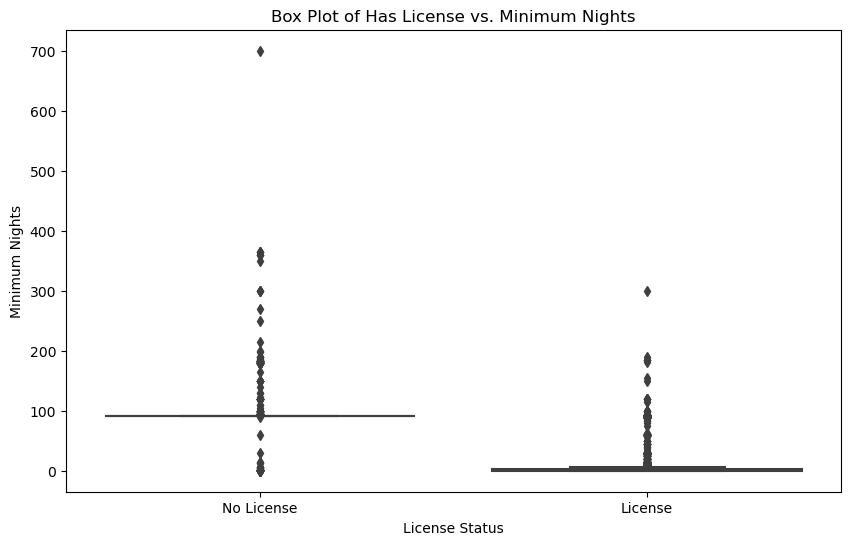

In [31]:
# Create a box plot to compare has_license with minimum_nights
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_license', y='minimum_nights', data=df_listing)
plt.xlabel('License Status')
plt.ylabel('Minimum Nights')
plt.title('Box Plot of Has License vs. Minimum Nights')

# Rename the x-axis labels
plt.xticks([0, 1], ['No License', 'License'])

# Define the path and save the plot
path2 = r'/Users/quincy/Documents/CF_Da/6/Airbnb Berlin/04 Visualization'
plt.savefig(os.path.join(path2, 'license_vs_minimum_nights.png'))


Prepare test

In [12]:
# Prepare the data
X = df_listing[['has_license']]
y = df_listing['minimum_nights']

# Split the data into training and testing sets (here I'm going with the standard 80/20 split for training/testing, thus 0.2 is 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Run the Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [14]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 867.1005490252238
R^2 Score: 0.6016624270818517


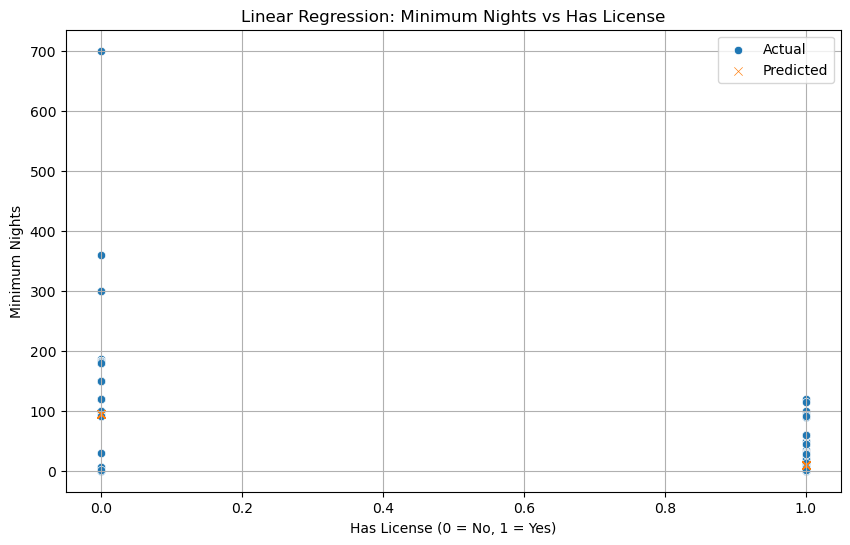

In [17]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['has_license'], y=y_test, label='Actual')
sns.scatterplot(x=X_test['has_license'], y=y_pred, label='Predicted', marker='x')
plt.xlabel('Has License (0 = No, 1 = Yes)')
plt.ylabel('Minimum Nights')
plt.title('Linear Regression: Minimum Nights vs Has License')
plt.legend()
plt.grid(True)



Here I learned that running a linear regression with categorical variables appears to yield the same result as calculating the means.